In [3]:
import geoplot as gplt #conda install -c conda-forge geoplot
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

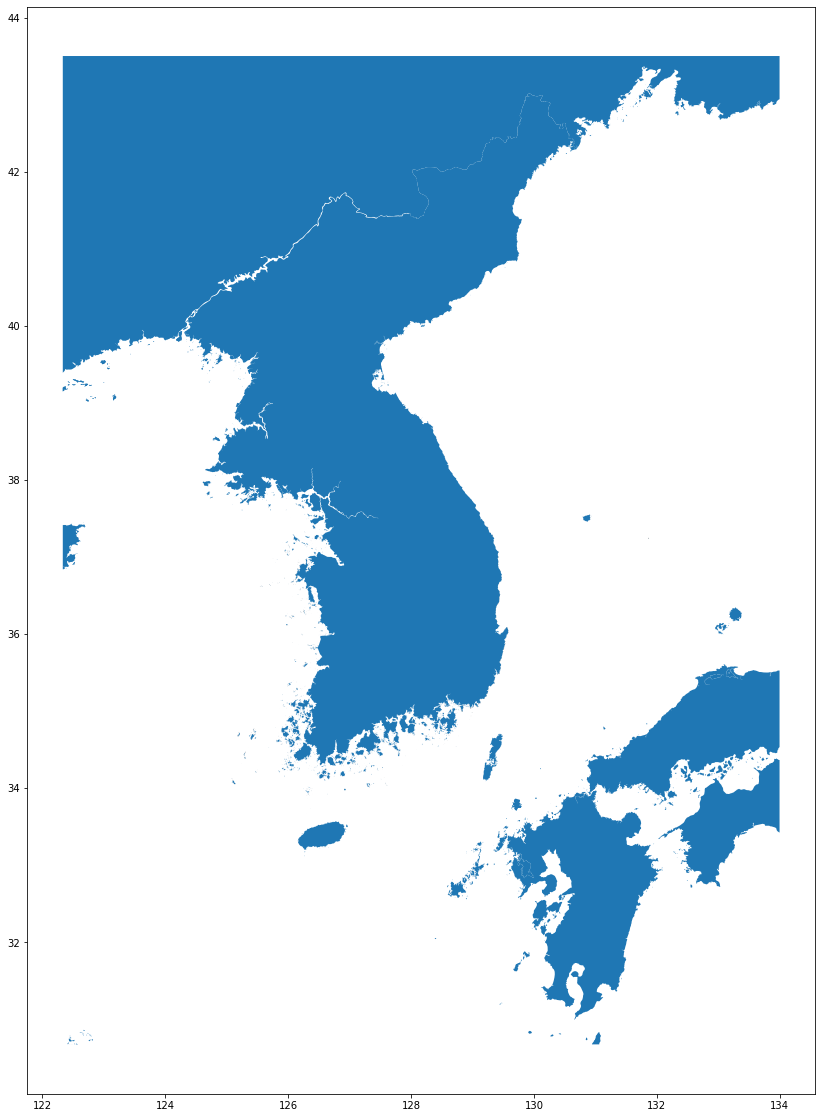

In [2]:
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='euc-kr')  
coastline.plot(figsize=(20,20))
coastline.crs

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

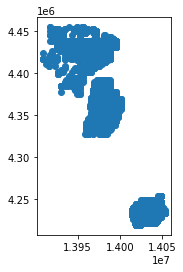

In [4]:
data = pd.read_csv('test.csv', encoding='euckr')
data.columns = ['total', 'MIN3', 'MIN1', 'lon','lat']
columns= ['total', 'lon', 'lat']
geom_fish = gpd.points_from_xy(data.lon, data.lat)

gdf_fish = gpd.GeoDataFrame(data[columns], geometry=geom_fish, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_fish = gdf_fish.to_crs(epsg=3857)
gdf_fish.head()
gdf_fish.plot()

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

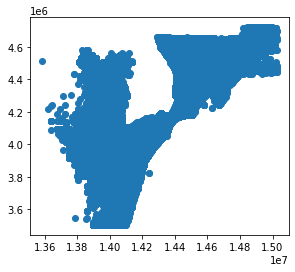

In [5]:
data = pd.read_csv('&안전국어획고_2017_SJ_AREA.csv', encoding='euckr')
data.columns
data = data[['그룹','어업생산이', 'X_center', 'Y_center']]
geom_fish2 = gpd.points_from_xy(data.X_center, data.Y_center)
gdf_fish2 = gpd.GeoDataFrame(data, geometry=geom_fish2, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_fish2 = gdf_fish2.to_crs(epsg=3857)
gdf_fish2.head()
gdf_fish2.plot()

In [6]:
coastline2 = coastline.to_crs(epsg=3857)
# coastline2.plot(color="goldenrod", edgecolor='k')

In [7]:
gdf_fish4326 = gdf_fish.to_crs(epsg=4326)
gdf_fish2_4326 = gdf_fish2.to_crs(epsg=4326)
coastline2_4326 = coastline2.to_crs(epsg=4326)

In [ ]:
import mapclassify

In [8]:
gal=pd.read_csv('All_to_갈치류.csv',encoding='euckr')

In [9]:
data = pd.read_csv('&안전국어획고_2017_SJ_AREA.csv', encoding='euckr')
data2= data[['그룹','어업생산이','MIN1', 'X_center', 'Y_center']]
grouped = data2.groupby('MIN1')
data2 = pd.DataFrame(grouped.mean()[['X_center', 'Y_center']])
data2.reset_index(inplace=True)
GRID_LIST = data['MIN1']

In [10]:
match_df = pd.DataFrame()
GRID_LIST = gal['MIN1']
count=0
for GRID in GRID_LIST:
    print(len(GRID_LIST)-count)
    df2= data2[data2['MIN1']==GRID]
    match_df = match_df.append(df2[['MIN1', 'X_center', 'Y_center']])
    # print(df2[['X_center', 'Y_center']])
    count+=1
match = pd.merge(match_df, gal, on='MIN1', how='outer')

37617
37616
37615
37614
37613
37612
37611
37610
37609
37608
37607
37606
37605
37604
37603
37602
37601
37600
37599
37598
37597
37596
37595
37594
37593
37592
37591
37590
37589
37588
37587
37586
37585
37584
37583
37582
37581
37580
37579
37578
37577
37576
37575
37574
37573
37572
37571
37570
37569
37568
37567
37566
37565
37564
37563
37562
37561
37560
37559
37558
37557
37556
37555
37554
37553
37552
37551
37550
37549
37548
37547
37546
37545
37544
37543
37542
37541
37540
37539
37538
37537
37536
37535
37534
37533
37532
37531
37530
37529
37528
37527
37526
37525
37524
37523
37522
37521
37520
37519
37518
37517
37516
37515
37514
37513
37512
37511
37510
37509
37508
37507
37506
37505
37504
37503
37502
37501
37500
37499
37498
37497
37496
37495
37494
37493
37492
37491
37490
37489
37488
37487
37486
37485
37484
37483
37482
37481
37480
37479
37478
37477
37476
37475
37474
37473
37472
37471
37470
37469
37468
37467
37466
37465
37464
37463
37462
37461
37460
37459
37458
37457
37456
37455
37454
37453
37452
3745

In [11]:
match.dropna(inplace=True)
match

,MIN1,X_center,Y_center,어업생산이
0,GR9_F2I13_I5,124.175000,37.675000,913311.0
1,GR9_F2I14_P1,124.258333,37.591667,913311.0
2,GR9_F2I14_U7,124.258333,37.508333,1826622.0
3,GR9_F2I21_A2,124.525000,37.991667,288167881.0
4,GR9_F2I21_Y3,124.741667,37.791667,1972752.0
...,...,...,...,...
31153,GR9_J2G43_V6,126.591667,30.025000,11873043.0
31154,GR9_J2G43_V8,126.575000,30.008333,8493792.0
31155,GR9_J2G43_V9,126.591667,30.008333,17352909.0
31156,GR9_J2G43_W1,126.608333,30.041667,5479866.0


In [12]:
geom_match = gpd.points_from_xy(match.X_center, match.Y_center)
gdf_match = gpd.GeoDataFrame(match[['MIN1','어업생산이']], geometry=geom_match, crs=from_epsg(4326))
gdf_match = gdf_match.to_crs(epsg=3857)
# gdf_match.head()
# gdf_match.plot()
gdf_match4326 = gdf_match.to_crs(epsg=4326)

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geoplot\geoplot.py:623: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(


TypeError: Image data of dtype object cannot be converted to float

<Figure size 3600x2160 with 0 Axes>

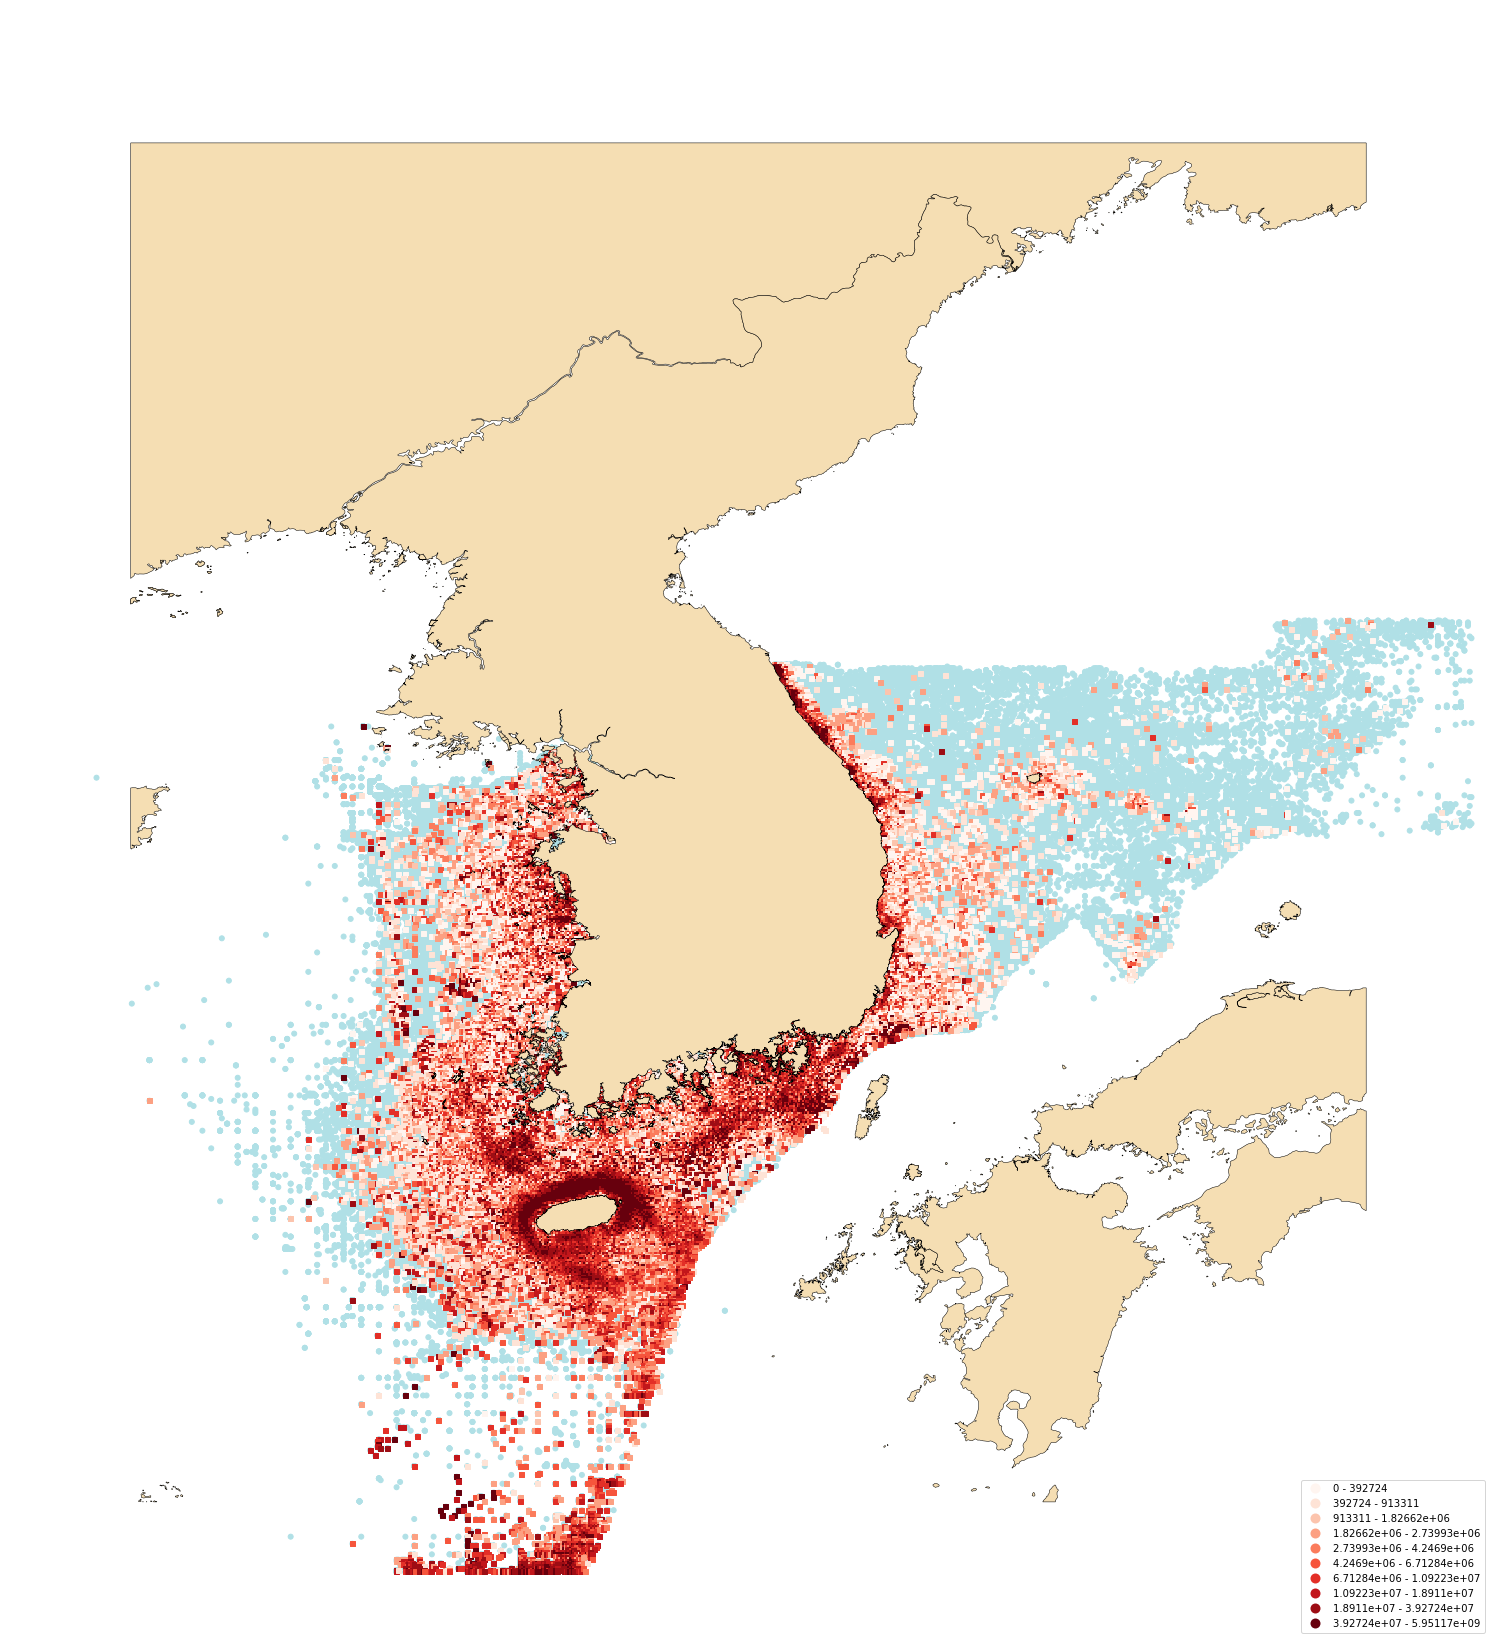

In [15]:
scheme = mapclassify.Quantiles(gdf_match4326['어업생산이'], k=10)
ax = gplt.pointplot(gdf_fish2_4326, color='powderblue',figsize=(50, 30))
# gplt.kdeplot(gdf_match4326, levels=50, cmap='coolwarm', cbar=True, figsize=(50, 30), alpha=1, shade=True,  ax = ax)
# gplt.kdeplot(gdf_match4326, hue='어업생산이', scheme=scheme,  cbar=True, figsize=(50, 30), shade=True,  ax = ax)
gplt.pointplot(gdf_match4326,hue ='어업생산이',scheme=scheme, legend = True, cmap='Reds',figsize=(50, 30), ax=ax, marker='s')
gplt.polyplot(coastline2_4326, facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)


<AxesSubplot:>

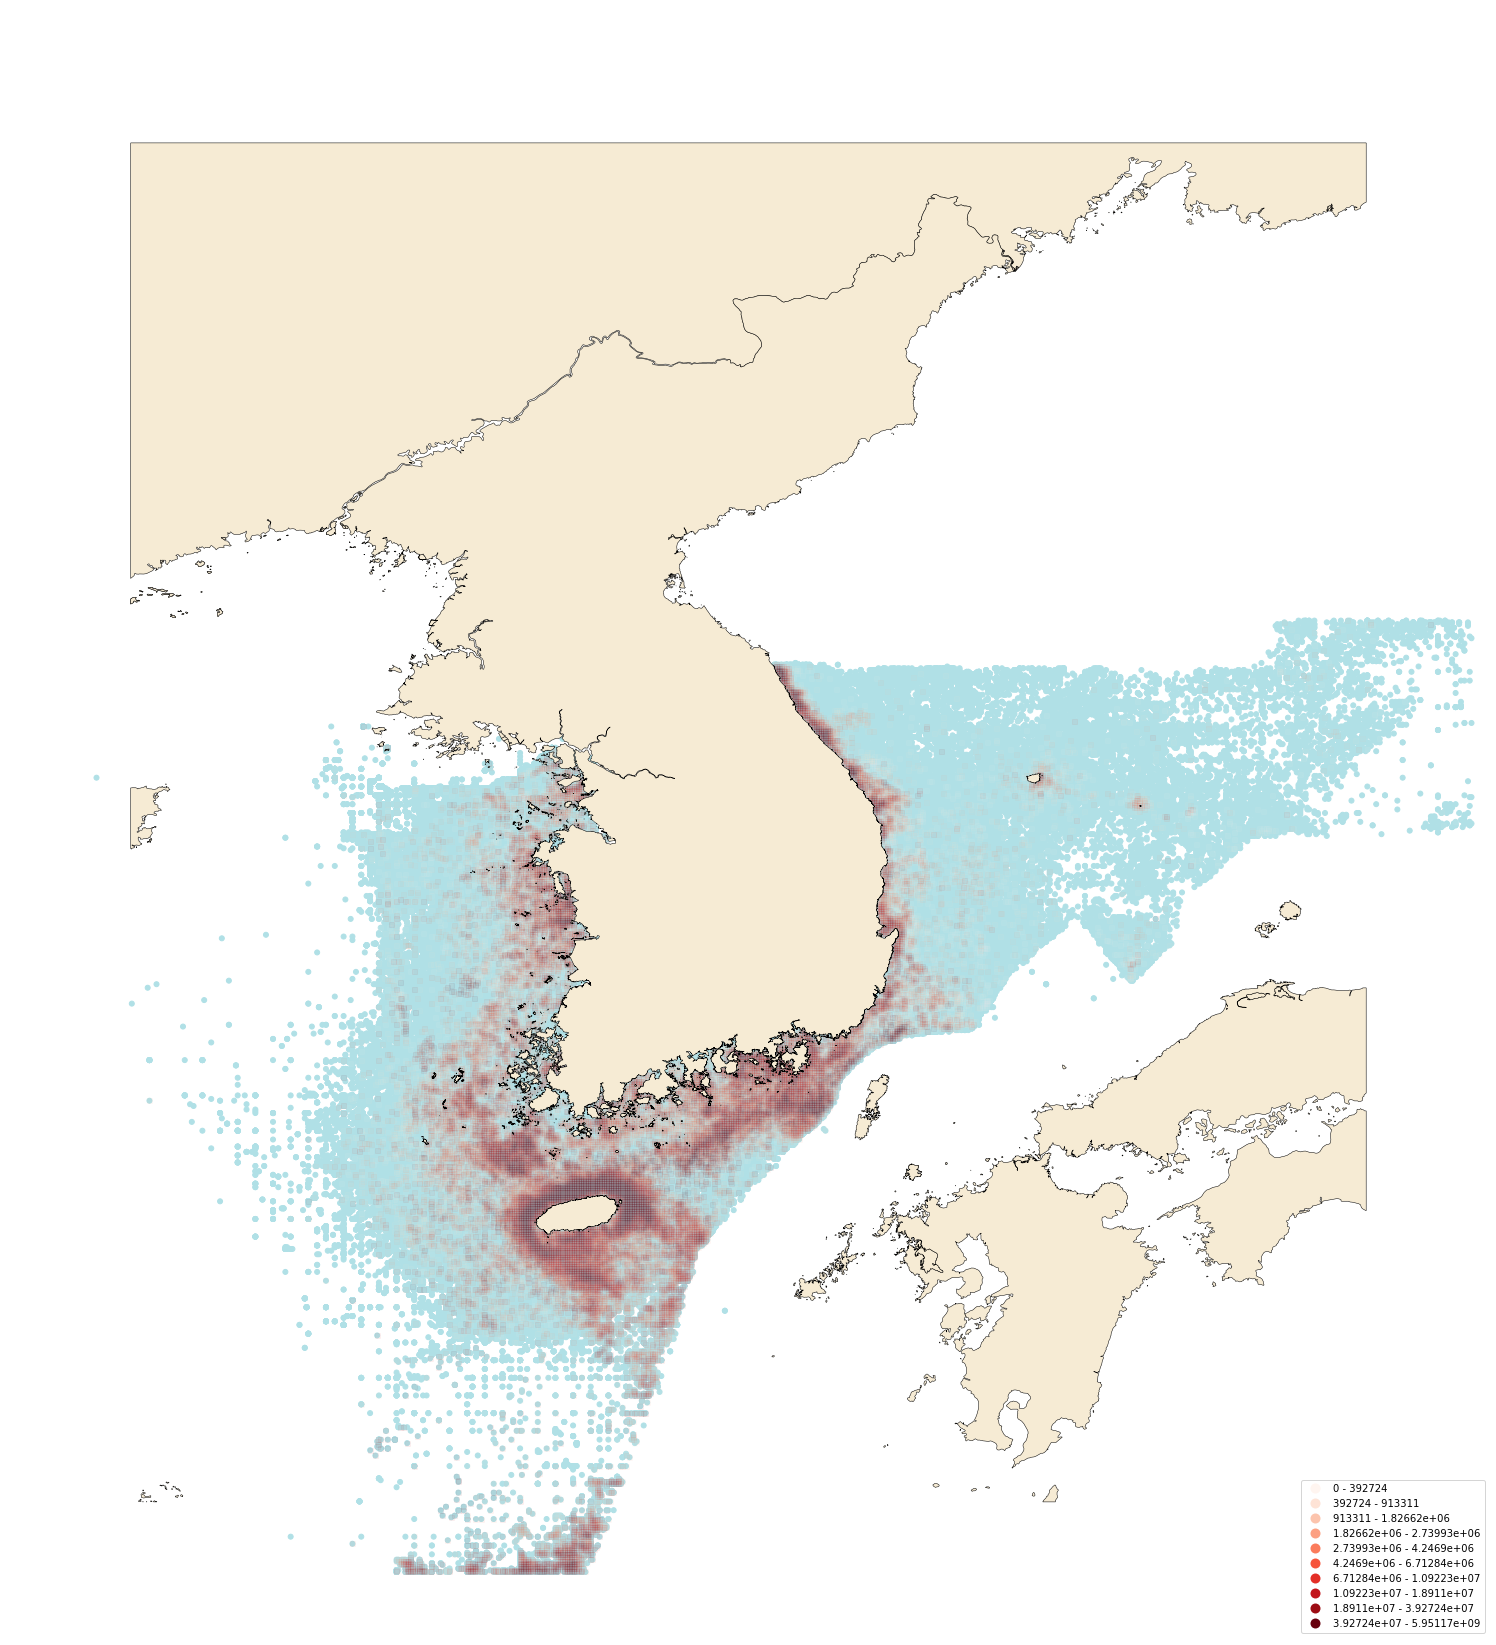

In [28]:
scheme = mapclassify.Quantiles(gdf_match4326['어업생산이'], k=10)
ax = gplt.pointplot(gdf_fish2_4326, color='powderblue',figsize=(50, 30))
# gplt.kdeplot(gdf_match4326, levels=50, cmap='coolwarm', cbar=True, figsize=(50, 30), alpha=1, shade=True,  ax = ax)
# gplt.kdeplot(gdf_match4326, hue='어업생산이', scheme=scheme,  cbar=True, figsize=(50, 30), shade=True,  ax = ax)
gplt.pointplot(gdf_match4326,hue ='어업생산이',scheme=scheme, legend = True, cmap='Reds',figsize=(50, 30), ax=ax, marker='s', alpha= 0.05)
gplt.polyplot(coastline2_4326, facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)


<AxesSubplot:>

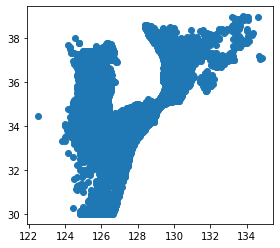

In [22]:
gdf_match4326.convex_hull.plot()

In [ ]:
for i in range(5):
    scheme = mapclassify.Quantiles(gdf_match4326['어업생산이'], k=10*(i+1))
    ax = gplt.pointplot(gdf_fish2_4326, color='ivory',figsize=(50, 30))
    gplt.pointplot(gdf_match4326,hue ='어업생산이',scheme=scheme, legend = True, cmap='jet',figsize=(50, 30), ax=ax, marker='s',
    legend_kwargs={'frameon': False, 'loc': 'lower right'})
    gplt.polyplot(coastline2_4326, facecolor='wheat', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.savefig('test_'+str(10*(i+1)))